<a href="https://colab.research.google.com/github/apolaf44/GeneralRepository/blob/main/TP4/Clasificador_Audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos dependencias

In [49]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/LICENSE.txt
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/libdivide/libdivide.h
    /usr/local/lib/python3.7/dist-packages/tensorflow/include/external/local_config_python/numpy_include/numpy/random

In [50]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 438 kB 46.8 MB/s 
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
     |████████████████████████████████| 1.6 MB 39.2 MB/s 
     |████████████████████████████████| 5.8 MB 37.4 MB/s 
  Using cached tensorflow_gpu-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfull

Cargamos las dependencias

In [1]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


# **2. Creamos Funciones para cargar la Data**

2.1 Definir Paths a Files

In [2]:
Capuchino_file = os.path.join('DATA' , '/content/DATA/Capuchinos Clips' , 'XC3776-3.wav' )
No_Capuchino_file = os.path.join('DATA' , '/content/DATA/No Capuchinos' , 'afternoon-birds-song-in-forest-0.wav')

In [108]:
Capuchino_file

'/content/DATA/Capuchinos Clips/XC3776-3.wav'

In [11]:
len(No_Capuchino_file)

65

In [44]:
def load_wav_16k_mono(filename):
  # Cargamos las carpetas wav 
  file_contents = tf.io.read_file(filename)
  # Decodificamos a  y en Mono
  wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)
  # Removemos Axis
  wav = tf.squeeze(wav, axis=-1)
  sample_rate = tf.cast(sample_rate , dtype=tf.int64)
  # Va desde 44100Hz a 16000Hz - Amplitud de la señal de audio
  wav = tfio.audio.resample(wav , rate_in=44100 , rate_out=16000)
  return wav


In [18]:
# En este caso solo nos trae los archivos convertidos en Strings
file_contents = tf.io.read_file(Capuchino_file)

In [19]:
 # Aqui decodificamos a Wav neustros arcivhos y que sea de 1 canal = Mono
 wav , sample_rate = tf.audio.decode_wav(file_contents , desired_channels=1)

In [9]:
# Nos trae la Amplitud 
#len(wav)
wav

NameError: ignored

2.3 Plot Wave

In [8]:
wave = load_wav_16k_mono(Capuchino_file)

In [9]:
nwave = load_wav_16k_mono(No_Capuchino_file)

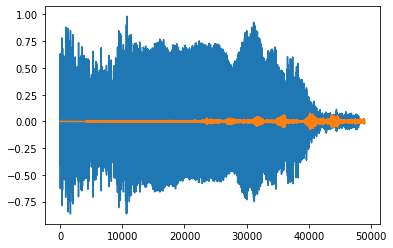

In [10]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

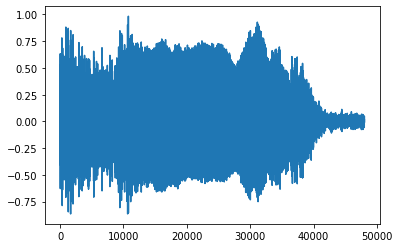

In [44]:
plt.plot(wave)


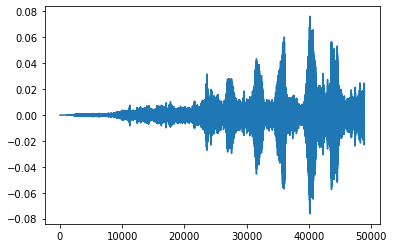

In [45]:
plt.plot(nwave)

# **3.Creacion Dataset con Tensorflow**

 3.1 Definimos Paths para Data positiva y negativa

In [83]:
POS = os.path.join('DATA' , '/content/DATA/Capuchinos Clips')
NEG = os.path.join('DATA' , '/content/DATA/No Capuchinos' )

In [84]:
POS

'/content/DATA/Capuchinos Clips'

3.2 Creamos Tensorflow Datasets

In [85]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

# En este caso lo que logramos es crear un Dataset
# con TensorFlow y traer todos los valores que terminan con .wav

In [89]:
pos.as_numpy_iterator().next()
# Tiene el Path Definido, pero es un String

b'/content/DATA/Capuchinos Clips/XC22397-6.wav'

3.3 Adherimos etiquetas y combinamos samples Positivos y Negativos

In [15]:
len(pos)
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [16]:
len(neg)
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [90]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [78]:
# Utilizando el .zip nos permite concatenar en una misma linea
# Entonces le pasamos nuestro Dataset pos y lo concatenamos con el mismo Dataset pero con numeros 1 en cada una de sus filas
# Creame 1 segun el shape de nuestro set pos

# Hacemos lo mismo con el metodo .zeros

# Entonces al final tendremos un Clasificador Binario



In [93]:
positives.as_numpy_iterator().next()
# Al ver su Path, tambien logramos apreciar el Numero 1.0

(b'/content/DATA/Capuchinos Clips/XC216010-2.wav', 1.0)

In [81]:
negatives.as_numpy_iterator().next()
# Numero 0.0 

(b'/content/DATA/No Capuchinos/curlew-sound-0.wav', 0.0)

In [86]:
data.shuffle(1000).as_numpy_iterator().next()
# Si vemos nuestro nuevo set de datos binario y lo vamos probando
# Obtendremos valores diferentes siempre, entre 0 & 1`s

(b'/content/DATA/No Capuchinos/rain-thunder-and-crickets-sound-effect-16.wav',
 0.0)

# **4. Determinar el tamaño Promedio(AVG) del canto de las Aves Capuchinos**

4.1 Calcular el tamaño del Circulo de la Onda

In [48]:
lengths = []
for archivo in os.listdir(os.path.join('DATA', '/content/DATA/Capuchinos Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('DATA', '/content/DATA/Capuchinos Clips', archivo))
    lengths.append(len(tensor_wave))


In [ ]:
# Creamos una Variable con un Array
# lengths = []

In [51]:
# listdir()

# Listar directorio en Python con listdir()
#Esta función recibe como argumento una ruta 
#del sistema de ficheros y devuelve una lista 
#con los nombres de los archivos y carpetas que contiene. 
#Si no se pasa ningún argumento, el directorio de referencia 
#es la carpeta actual.

#os.listdir(os.path.join('DATA' , '/content/DATA/Capuchinos Clips'))

In [53]:
#lengths

4.2 Media, Minimo y Máximo

In [54]:
# Promedio/ Media
tf.math.reduce_mean(lengths)
# reduce_mean. Calcula la media de elementos 
# a través de las dimensiones de un tensor.

# Tenemos 54387 Valores

<tf.Tensor: shape=(), dtype=int32, numpy=54387>

In [57]:
# Tenemos 16.000 Hz Per Second

54387/16000

3.3991875

In [58]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=8000>

In [60]:
# El más cortito dura:
8000/16000

0.5

In [59]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [63]:
# El más largo dura:
80000/16000

5.0

# **5. Construimos Funcion Pre-Procesada para Convertir a Espectograma**

5.1 Función pre-procesada

In [117]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav) , dtype=tf.float32)
    wav = tf.concat([zero_padding , wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram , axis=2)
    return spectrogram, label 

5.2 Probamos la funcion y Visualizamos el Espectograma

In [135]:
filepath , label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [136]:
spectrogram, label = preprocess(filepath, label)

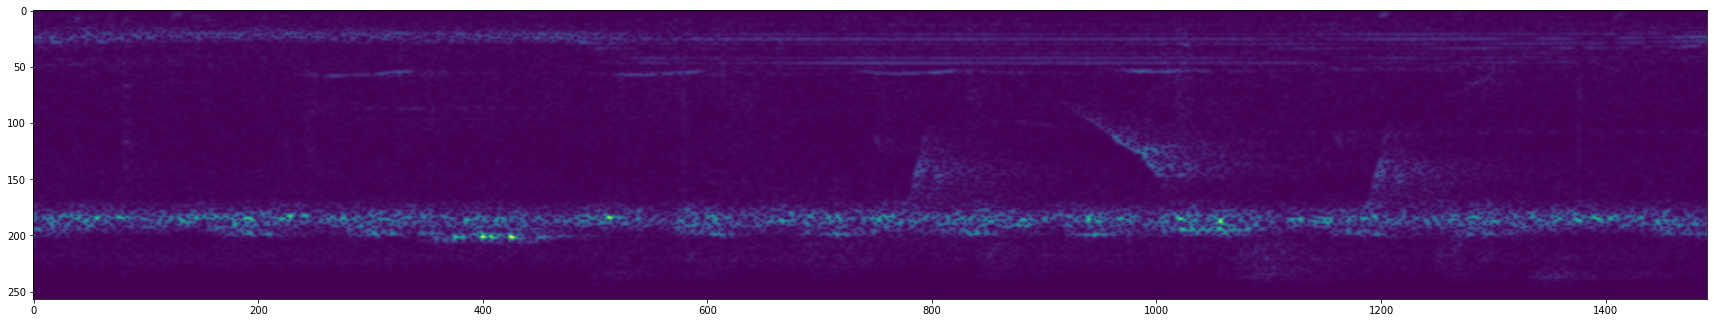

In [142]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **6. Creamos particiones de Training y Testing**

6.1 Creamos un Tensorflow y Data Pipeline

In [144]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

TypeError: ignored

6.2 Mezclamos entre particiones de Train y Test